In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r'C:\Users\raosa\Desktop\eda\files\income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
df.rename(columns={'Income($)':'Income'},inplace=True)

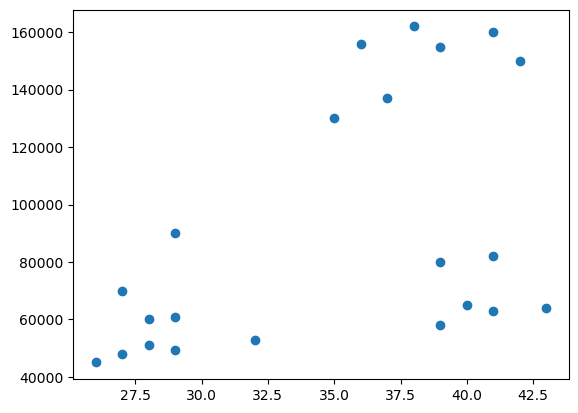

In [8]:
plt.scatter(df.Age,df.Income)

In [9]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
y_pred=km.fit_predict(df[['Age','Income']])
y_pred


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [12]:
df['cluster']=y_pred
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


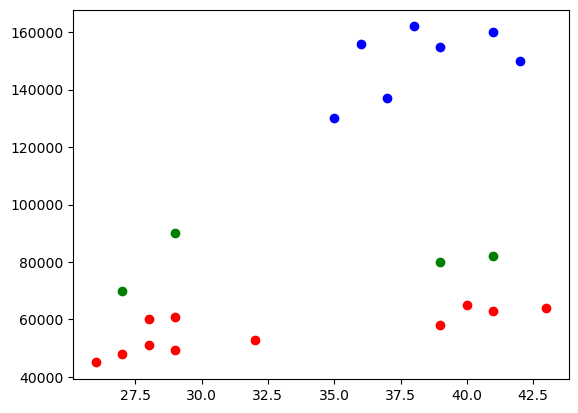

In [17]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='blue')
plt.scatter(df3.Age,df3.Income,color='red')



In [22]:
scaler=MinMaxScaler()
df['Newincome']=scaler.fit_transform(df[['Income']])
df.head()


,Name,Age,Income,cluster,Newincome
0,Rob,27,70000,0,0.213675
1,Michael,29,90000,0,0.384615
2,Mohan,29,61000,2,0.136752
3,Ismail,28,60000,2,0.128205
4,Kory,42,150000,1,0.897436


In [23]:
df['Newage']=scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income,cluster,Newincome,Newage
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [24]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Newage','Newincome']])

y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [27]:
print(km.cluster_centers_[:,0])
km.cluster_centers_


[0.85294118 0.72268908 0.1372549 ]


array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

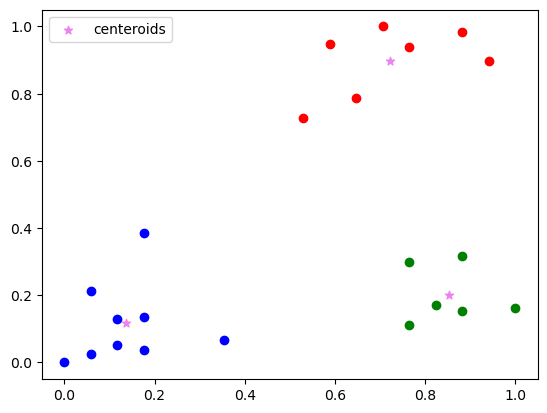

In [29]:
df['cluster']=y_pred
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Newage,df1.Newincome,color='green')
plt.scatter(df2.Newage,df2.Newincome,color='red')
plt.scatter(df3.Newage,df3.Newincome,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='violet',marker='*',label='centeroids')
plt.legend()

In [30]:
krange=range(1,10)
sse=[] #sum of square error 
for k in krange:
    km=KMeans(n_clusters=k)
    km.fit(df[['Newage','Newincome']])
    km.inertia_ #gives sum of square error 
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.18185811965571239,
 0.13265419827245162,
 0.10497488680620909]

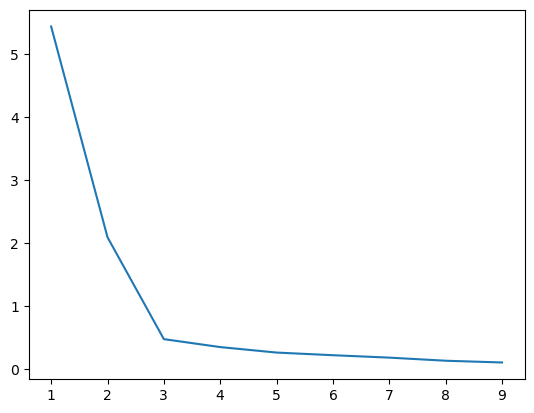

In [33]:
plt.plot(krange,sse)